In [19]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up

In [20]:
data = []
for file in sorted(os.listdir('Data')):
        with open('Data/'+file, mode='r') as tf:
            data = np.genfromtxt(tf,delimiter="\t").T

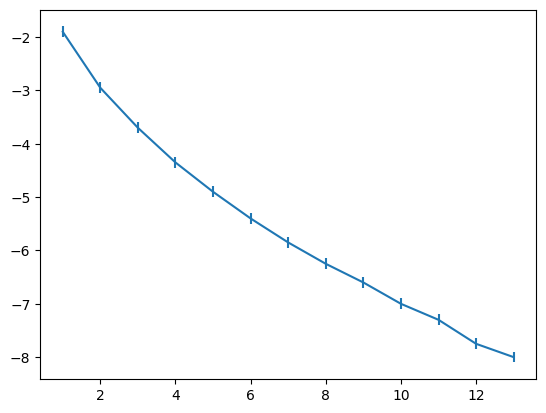

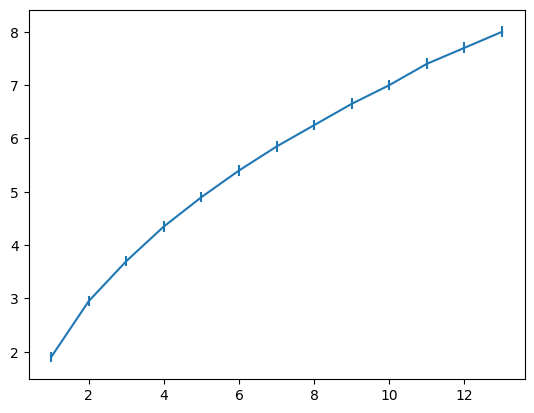

In [21]:
ord = data[0]
m1 = up.uarray(data[1],np.full(len(data[1]),0.1))
m2 = up.uarray(data[2],np.full(len(data[2]),0.1))
m1 = m1-8
m2 = m2-8

plt.errorbar(ord,up.nominal_values(m1),yerr=up.std_devs(m1))
plt.show()
plt.errorbar(ord,up.nominal_values(m2),yerr=up.std_devs(m2))
plt.show()

In [22]:
#kp ob das richtig is sost nehmen wa nur2
m1lin = np.square(m1)
m2lin = np.square(m2)


In [23]:
res1 = f.linear_fit(up.nominal_values(m1lin),ord,up.std_devs(m1lin))
res2 = f.linear_fit(up.nominal_values(m2lin),ord,up.std_devs(m2lin))

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 1.00222988
    reduced chi-square = 0.09111181
    Akaike info crit   = -29.3153855
    Bayesian info crit = -28.1854868
    R-squared          = 0.99978307
[[Variables]]
    slope:      5.04874212 +/- 0.02084525 (0.41%) (init = 5.037225)
    intercept: -1.39870170 +/- 0.10484221 (7.50%) (init = -1.315)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.744


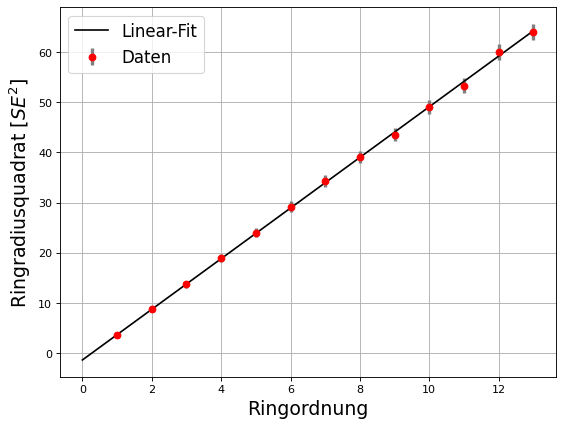

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 0.29623646
    reduced chi-square = 0.02693059
    Akaike info crit   = -45.1601067
    Bayesian info crit = -44.0302079
    R-squared          = 0.99993632
[[Variables]]
    slope:      5.06926262 +/- 0.01134734 (0.22%) (init = 5.055591)
    intercept: -1.43555756 +/- 0.05700871 (3.97%) (init = -1.338942)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.744


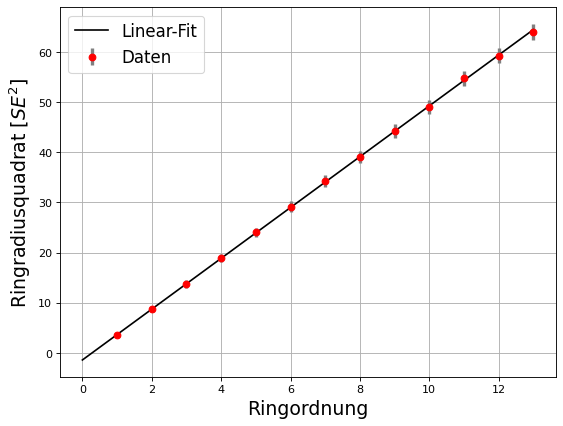

In [26]:
print(res1.fit_report())
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)

plt.errorbar(ord,up.nominal_values(m1lin),yerr = up.std_devs(m1lin),fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten')
plt.plot(np.arange(0,14),res1.eval(x=np.arange(0,14)),color='k',linestyle='-',alpha=1,label="Linear-Fit")


plt.ylabel('Ringradiusquadrat $[SE^2]$',fontsize = 17)
plt.xlabel('Ringordnung',fontsize = 17)
plt.grid()
plt.legend(fontsize = 15)
plt.show()


print(res2.fit_report())
fig = plt.figure(figsize=(8,6),dpi=80,linewidth=50)
plt.errorbar(ord,up.nominal_values(m2lin),yerr = up.std_devs(m2lin),fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten')
plt.plot(np.arange(0,14),res2.eval(x=np.arange(0,14)),color='k',linestyle='-',alpha=1,label="Linear-Fit")



plt.ylabel('Ringradiusquadrat $[SE^2]$',fontsize = 17)
plt.xlabel('Ringordnung',fontsize = 17)
plt.grid()
plt.legend(fontsize = 15)
plt.show()